In [2]:
import torch

from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from utils.image import *
from models import Conv2dCNP
import matplotlib.pyplot as plt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [ ]:
weights_path = "convcnp.pth"

device = torch.device("cpu")
model = Conv2dCNP(3, 128, 9).to(device)
model.load_state_dict(torch.load(weights_path))

In [ ]:
testset = CIFAR10("data", "test", download=True, transform=transforms.ToTensor())
testloader = DataLoader(testset, 8, True)

In [46]:
model.eval()
original = next(iter(testloader))[0]

erased_rect, mask_rect = mask_rectangle(original, (0.2, 0.2), (1 / 3, 3))
erased_rand, mask_rand = mask_random(original, 0.8)

inpainted_rect = model(erased_rect, mask_rect).mean
inpainted_rand = model(erased_rand, mask_rand).mean

mse_rect = ((original - inpainted_rect) ** 2).mean()
mse_rand = ((original - inpainted_rand) ** 2).mean()

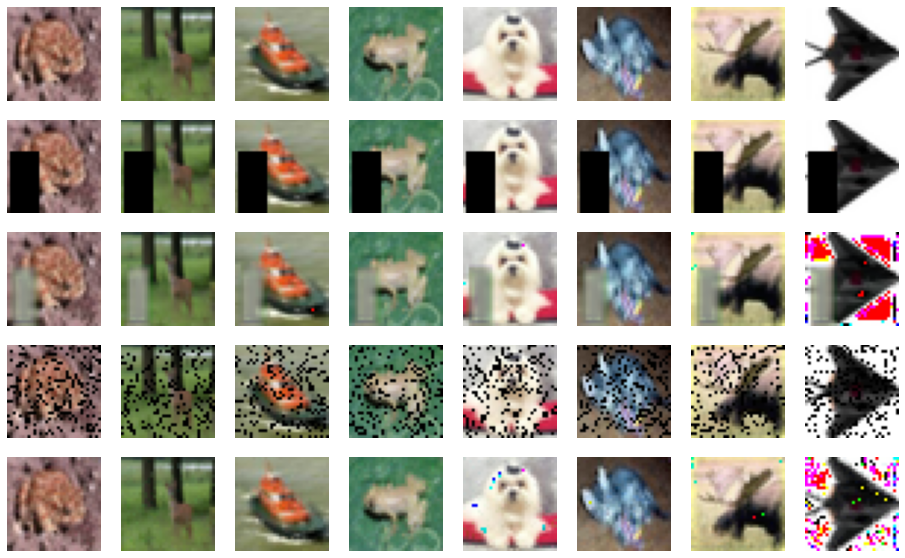

In [47]:
fig, ax = plt.subplots(5, 8, figsize=(16, 10))

for i in range(8):
    ax[0, i].imshow(to_pil_image(original[i]))
    ax[1, i].imshow(to_pil_image(erased_rect[i]))
    ax[2, i].imshow(to_pil_image(inpainted_rect[i]))
    ax[3, i].imshow(to_pil_image(erased_rand[i]))    
    ax[4, i].imshow(to_pil_image(inpainted_rand[i]))

[p.set_axis_off() for p in ax.ravel()]
plt.show()